# WeatherPy

Observations:
1. Temperatures are higher as we get closer to the equator. Northern hemisphere temperatures are cooler (wintry) than southern now. 
2. Wind speeds are relatively lower near equator. There are more cities with higher wind speed in northern hemisphere. 
3. Cloudinss and humidity do not have specific trends as such.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Get today's date for charts
from datetime import date
today_ymd=date.today()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# use imperial units (Farenheit)
units = "imperial"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&units=" + units + "&q=" 
 
# To store the data as we run through cities
store_data = []

# counters
record_num=1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    # Build query URL
    query_url = url + city
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Extract required data elements
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        temperature = weather_json["main"]["temp"]
        wind_speed = weather_json["wind"]["speed"]


        # Add each set of data to the store_data
        store_data.append({"City": city, 
                           "Cloudiness": cloudiness,
                           "Country": country,
                           "Date": date,
                           "Humidity": humidity,
                           "Lat": lat, 
                           "Lng": lng, 
                           "Max Temp": max_temp,
                           "Temperature": temperature,
                           "Wind Speed": wind_speed})
        
        print(f"Processing Record {record_num} : {city}")

        record_num += 1

    except:

        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 : hobart
Processing Record 2 : ushuaia
Processing Record 3 : qui nhon
Processing Record 4 : talnakh
Processing Record 5 : carnarvon
Processing Record 6 : birao
Processing Record 7 : cape town
Processing Record 8 : arraial do cabo
Processing Record 9 : sao filipe
Processing Record 10 : punta arenas
Processing Record 11 : flin flon
City not found. Skipping...
Processing Record 12 : pitkyaranta
Processing Record 13 : bluff
Processing Record 14 : qaanaaq
Processing Record 15 : katangli
Processing Record 16 : tuktoyaktuk
Processing Record 17 : tasiilaq
Processing Record 18 : gayny
Processing Record 19 : cabedelo
Processing Record 20 : rio cuarto
Processing Record 21 : new norfolk
Processing Record 22 : bayeux
Processing Record 23 : mar del plata
Processing Record 24 : puerto ayora
Processing Record 25 : touros
Processing Record 26 : thompson
Processing Record 27 : palm springs
Processing Record 28 : sabang
Processing

Processing Record 230 : huanren
Processing Record 231 : xuddur
City not found. Skipping...
Processing Record 232 : salalah
City not found. Skipping...
Processing Record 233 : puerto leguizamo
Processing Record 234 : bengkulu
Processing Record 235 : kalemie
Processing Record 236 : san francisco
Processing Record 237 : una
Processing Record 238 : rio gallegos
Processing Record 239 : kaseda
Processing Record 240 : wajir
City not found. Skipping...
Processing Record 241 : ivanovka
Processing Record 242 : senneterre
Processing Record 243 : brae
Processing Record 244 : atar
Processing Record 245 : ponta delgada
Processing Record 246 : highlands ranch
Processing Record 247 : puerto baquerizo moreno
Processing Record 248 : kabanjahe
Processing Record 249 : faanui
Processing Record 250 : chatra
Processing Record 251 : sapulpa
City not found. Skipping...
Processing Record 252 : dwarka
Processing Record 253 : sidney
Processing Record 254 : poum
Processing Record 255 : paamiut
Processing Record 25

Processing Record 457 : vulcan
Processing Record 458 : chifeng
City not found. Skipping...
Processing Record 459 : batie
Processing Record 460 : pallasovka
Processing Record 461 : iskateley
Processing Record 462 : odweyne
Processing Record 463 : pakxe
Processing Record 464 : francisco beltrao
Processing Record 465 : basco
City not found. Skipping...
Processing Record 466 : santa isabel
Processing Record 467 : ayorou
Processing Record 468 : honningsvag
Processing Record 469 : ahar
Processing Record 470 : savelugu
Processing Record 471 : marsabit
Processing Record 472 : beloha
Processing Record 473 : buenos aires
Processing Record 474 : senanga
Processing Record 475 : fort nelson
Processing Record 476 : lisala
Processing Record 477 : sohbatpur
Processing Record 478 : agirish
Processing Record 479 : kashi
Processing Record 480 : comodoro rivadavia
Processing Record 481 : guaymas
Processing Record 482 : mlimba
Processing Record 483 : erenhot
City not found. Skipping...
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
store_data_df=pd.DataFrame(store_data)
store_data_df.to_csv("output_file.csv")
store_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temperature,Wind Speed
0,hobart,40,AU,1585043003,62,-42.88,147.33,55.40,53.60,5.82
1,ushuaia,75,AR,1585043001,80,-54.80,-68.30,39.20,39.20,24.16
2,qui nhon,0,VN,1585043165,52,13.77,109.23,85.26,85.26,11.61
3,talnakh,75,RU,1585043006,92,69.49,88.40,12.20,12.20,29.08
4,carnarvon,26,AU,1585042724,62,-24.87,113.63,87.80,87.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

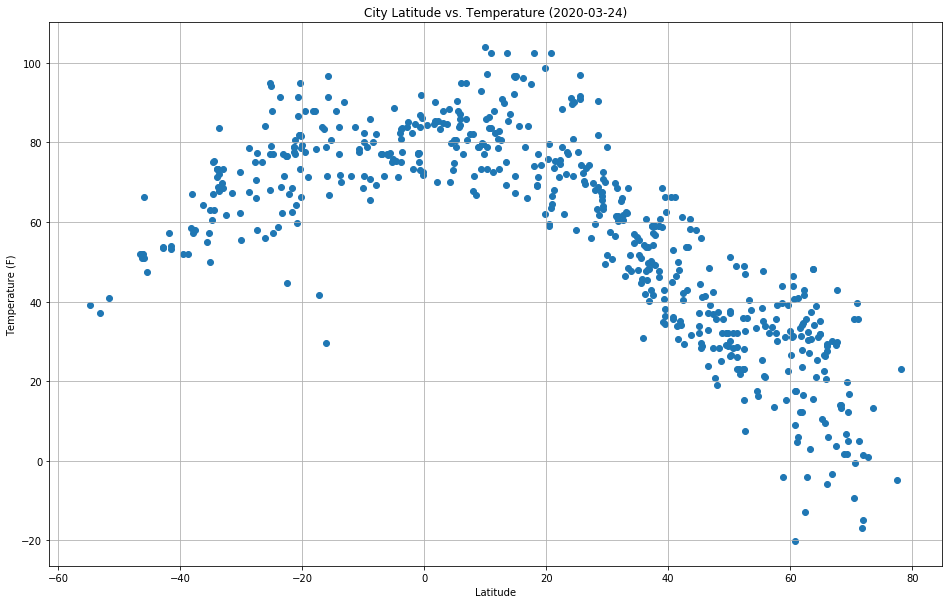

In [9]:
# 1. Build scatter plot to showcase the relationship: Temperature (F) vs. Latitude

plt.scatter(store_data_df["Lat"], 
            store_data_df["Temperature"])  

from datetime import date
today_ymd=date.today()

plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Temperature (" + str(today_ymd)+")")
plt.grid(True)
plt.rcParams["figure.figsize"] = (16,10)

# Save the figure
plt.savefig("Temp vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

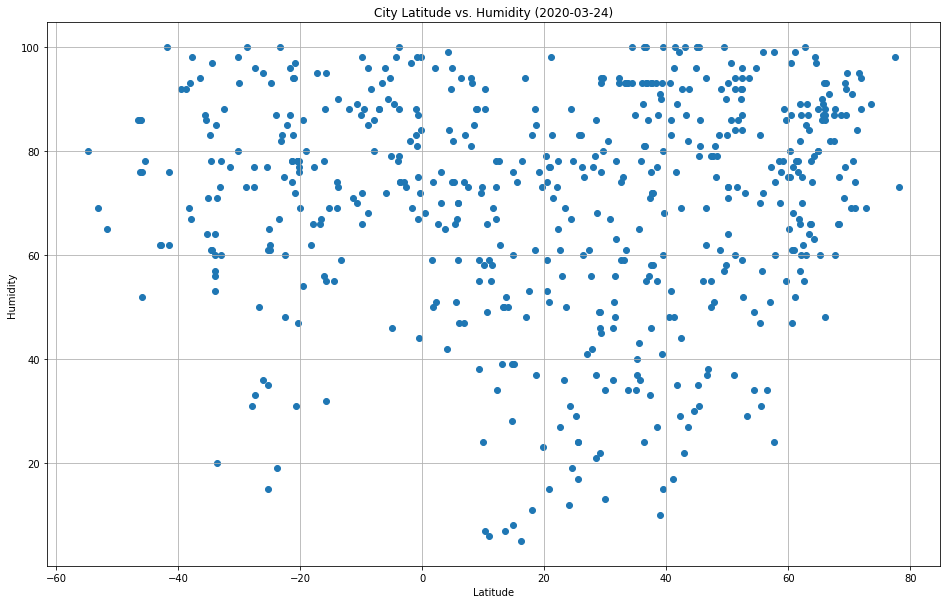

In [6]:
# 2. Build scatter plot to showcase the relationship: Humidity vs. Latitude

plt.scatter(store_data_df["Lat"], 
            store_data_df["Humidity"])  

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (" + str(today_ymd)+")")
plt.grid(True)
plt.rcParams["figure.figsize"] = (16,10)

# Save the figure
plt.savefig("Humidity vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

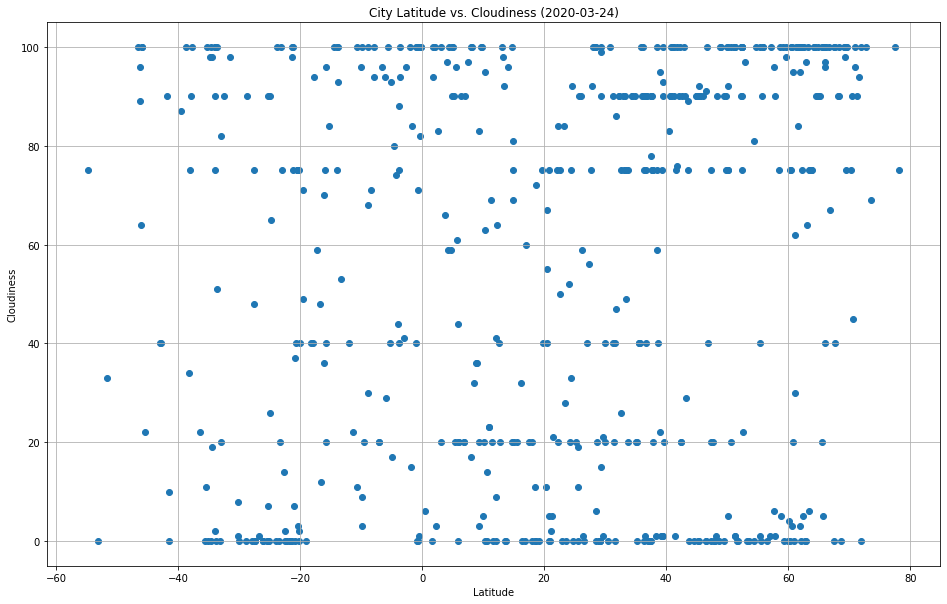

In [7]:
# 3. Build scatter plot to showcase the relationship: Cloudiness vs. Latitude

plt.scatter(store_data_df["Lat"], 
            store_data_df["Cloudiness"])  

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (" + str(today_ymd)+")")
plt.grid(True)
plt.rcParams["figure.figsize"] = (16,10)

# Save the figure
plt.savefig("Cloudiness vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

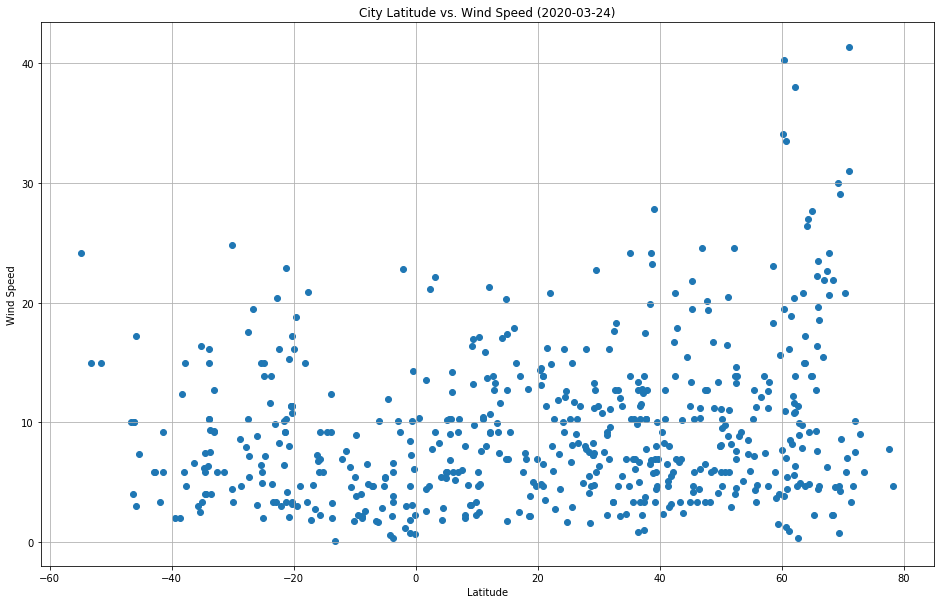

In [8]:
# 4. Build scatter plot to showcase the relationship: Wind Speed vs. Latitude

plt.scatter(store_data_df["Lat"], 
            store_data_df["Wind Speed"])  

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (" + str(today_ymd)+")")
plt.grid(True)
plt.rcParams["figure.figsize"] = (16,10)

# Save the figure
plt.savefig("Wind Speed vs Lat.png")

# Show plot
plt.show()